<a href="https://colab.research.google.com/github/Yen-hub/AI4E/blob/main/DIAML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install yfinance pandas numpy


In [ ]:
from logging import warning
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
warning = "ignore"

In [ ]:
djia_symbols = [
    "MMM", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "DIS",
    "GS", "HD", "HON", "IBM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE",
    "PG", "CRM", "TRV", "UNH", "VZ", "V", "WMT", "AMZN", "NVDA", "SHW"
]

In [ ]:
 #date range (minimum of two years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2 * 365 + 30) # A bit more than 2 years to ensure full data

print(f"Retrieving data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Retrieving data from 2023-11-02 to 2025-12-01


In [ ]:
# Downloading data for all symbols
data = yf.download(djia_symbols, start=start_date, end=end_date)

/tmp/ipython-input-1473554279.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(djia_symbols, start=start_date, end=end_date)
[*********************100%***********************]  30 of 30 completed


In [ ]:
data

Price            Close                                                  \
Ticker            AAPL        AMGN        AMZN         AXP          BA   
Date                                                                     
2023-11-03  174.767075  251.708374  138.600006  149.343704  195.050003   
2023-11-06  177.319595  254.478592  139.740005  149.568573  192.949997   
2023-11-07  179.881973  252.874344  142.710007  149.558792  191.410004   
2023-11-08  180.940552  254.879700  142.080002  149.588135  191.830002   
2023-11-09  180.465714  246.298508  140.600006  148.962433  193.330002   
...                ...         ...         ...         ...         ...   
2025-11-24  275.920013  334.299988  226.279999  355.929993  179.119995   
2025-11-25  276.970001  341.109985  229.669998  362.640015  182.440002   
2025-11-26  277.549988  344.570007  229.160004  363.970001  186.919998   
2025-11-28  278.850006  345.459991  233.220001  365.269989  189.000000   
2025-12-01  283.100006  337.489990  233.880005  360.309998  186.460007   

Price                                                                  ...  \
Ticker             CAT         CRM       CSCO         CVX         DIS  ...   
Date                                                                   ...   
2023-11-03  233.424683  205.310318  50.048252  133.840973   83.675079  ...   
2023-11-06  231.029800  205.260834  50.312607  133.287872   82.642288  ...   
2023-11-07  227.772034  209.634827  50.161541  130.939468   83.202942  ...   
2023-11-08  227.675110  209.268661  50.038807  129.116974   83.114426  ...   
2023-11-09  227.025467  207.823883  49.094681  128.699890   88.858658  ...   
...                ...         ...        ...         ...         ...  ...   
2025-11-24  559.599976  226.820007  76.239998  149.750000  101.940002  ...   
2025-11-25  566.609985  234.119995  76.320000  148.529999  103.309998  ...   
2025-11-26  573.729980  228.149994  76.070000  149.509995  103.430000  ...   
2025-11-28  575.760010  230.539993  76.940002  151.130005  104.470001  ...   
2025-12-01  568.059998  232.830002  76.040001  152.539993  106.769997  ...   

Price         Volume                                                   \
Ticker          MSFT       NKE       NVDA        PG      SHW      TRV   
Date                                                                    
2023-11-03  23637700   7568000  424610000   6587700  1444600  1682400   
2023-11-06  23828300   5231900  400733000   6480800  1048200  1327700   
2023-11-07  25833900   7745800  343165000   6003800  1017200  1022300   
2023-11-08  26767800   8639700  346719000   4832600  1173800  1165400   
2023-11-09  24847300   9154200  540496000   6581500  1116300   933400   
...              ...       ...        ...       ...      ...      ...   
2025-11-24  34421000  16681700  256618300  13846900  2306500  1825700   
2025-11-25  28019800  11527200  320600300  10477700  1452400  1708600   
2025-11-26  25709100  13791000  183852000   9238500  1174300  1094700   
2025-11-28  14386700   4941400  121332800   4707200   566800   566800   
2025-12-01  22886734   9841661  184609468   8238908  1238404   991847   

Price                                              
Ticker           UNH        V        VZ       WMT  
Date                                               
2023-11-03   2739500  5029800  23323200  17240100  
2023-11-06   2684900  5254100  15544000  14529000  
2023-11-07   2604800  4219700  17654600  15023400  
2023-11-08   1769200  5117500  16971500  15591900  
2023-11-09   1819600  4866600  15685800  15080100  
...              ...      ...       ...       ...  
2025-11-24  10773800  9337100  44805100  42519200  
2025-11-25   6149100  5854300  24375300  20212900  
2025-11-26   5504200  4309900  15186100  17783300  
2025-11-28   2464500  4586200   9926300   9846500  
2025-12-01   6071025  6969363  14973232  14347142  

[520 rows x 150 columns]

In [ ]:
#  'Close' prices
closing_prices = data['Close']

In [ ]:
# 2. Calculate the daily log returns for each index
log_returns = np.log(closing_prices / closing_prices.shift(1))

# Drop the first row which will contain NaN values due to the shift operation
log_returns = log_returns.dropna()

print("\nFirst 5 rows of daily log returns:")
log_returns.head()


First 5 rows of daily log returns:


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-06,0.014500,0.010946,0.008191,0.001505,-0.010825,-0.010313,-0.000241,0.005268,-0.004141,-0.012420,...,0.010517,0.001773,0.016440,0.005781,-0.001635,0.006746,0.004810,-0.000452,-0.010606,0.001335
2023-11-07,0.014347,-0.006324,0.021031,-0.000065,-0.008013,-0.014201,0.021086,-0.003007,-0.017776,0.006761,...,0.011157,0.019483,0.004449,-0.002321,0.005930,0.002592,0.008158,0.005243,0.008382,0.004659
2023-11-08,0.005868,0.007899,-0.004424,0.000196,0.002192,-0.000426,-0.001748,-0.002450,-0.014016,-0.001064,...,0.007378,0.000274,0.013380,-0.003859,0.016139,-0.008448,-0.002047,-0.001393,-0.004741,-0.008183
2023-11-09,-0.002628,-0.034247,-0.010471,-0.004192,0.007789,-0.002857,-0.006928,-0.019048,-0.003236,0.066829,...,-0.006935,-0.022091,0.008041,0.002264,-0.014514,0.000178,0.004220,-0.009350,-0.004202,-0.002315
2023-11-10,0.022954,0.012233,0.020834,0.013105,0.017027,0.023343,0.017090,0.011282,0.007090,-0.023180,...,0.024592,-0.008353,0.029073,0.007026,0.013185,0.008093,0.004092,0.014829,0.002523,0.013753


In [ ]:
# 3. Calculate the Pearson correlation matrix for these returns
correlation_matrix = log_returns.corr(method='pearson')

print("\nPearson Correlation Matrix for Daily Log Returns:")
correlation_matrix


Pearson Correlation Matrix for Daily Log Returns:


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.246039,0.485307,0.415774,0.337184,0.356602,0.329371,0.372884,0.297607,0.329336,...,0.484433,0.359027,0.350762,0.133070,0.365733,0.186556,0.013925,0.397541,0.079350,0.273571
AMGN,0.246039,1.000000,0.089872,0.245356,0.095152,0.231574,0.141749,0.229919,0.215471,0.157539,...,0.091868,0.172590,0.035617,0.266187,0.282769,0.189448,0.161853,0.287088,0.275879,0.104915
AMZN,0.485307,0.089872,1.000000,0.510033,0.387267,0.435652,0.457768,0.393125,0.261680,0.346103,...,0.632358,0.315133,0.505484,-0.045566,0.294571,0.106374,0.033776,0.346539,-0.094417,0.244986
AXP,0.415774,0.245356,0.510033,1.000000,0.436486,0.563073,0.401218,0.481008,0.426880,0.507117,...,0.414507,0.341253,0.334930,0.085300,0.419142,0.379135,0.111558,0.542902,0.071522,0.301351
BA,0.337184,0.095152,0.387267,0.436486,1.000000,0.291746,0.258559,0.289372,0.285377,0.291183,...,0.266396,0.293371,0.231058,0.012804,0.264654,0.160737,0.038898,0.278749,-0.039714,0.227052
CAT,0.356602,0.231574,0.435652,0.563073,0.291746,1.000000,0.334880,0.400981,0.423141,0.378190,...,0.392800,0.267331,0.366068,-0.044813,0.381064,0.235428,0.010264,0.322468,0.128441,0.135033
CRM,0.329371,0.141749,0.457768,0.401218,0.258559,0.334880,1.000000,0.309339,0.160831,0.276310,...,0.439994,0.190792,0.343914,0.027343,0.289857,0.166273,0.124127,0.306400,-0.097325,0.139347
CSCO,0.372884,0.229919,0.393125,0.481008,0.289372,0.400981,0.309339,1.000000,0.339363,0.327107,...,0.378464,0.304449,0.326405,0.105919,0.325402,0.228303,0.026194,0.405645,0.123641,0.338567
CVX,0.297607,0.215471,0.261680,0.426880,0.285377,0.423141,0.160831,0.339363,1.000000,0.353738,...,0.160987,0.225045,0.147678,0.081654,0.170995,0.284250,0.059447,0.291787,0.193614,0.130804


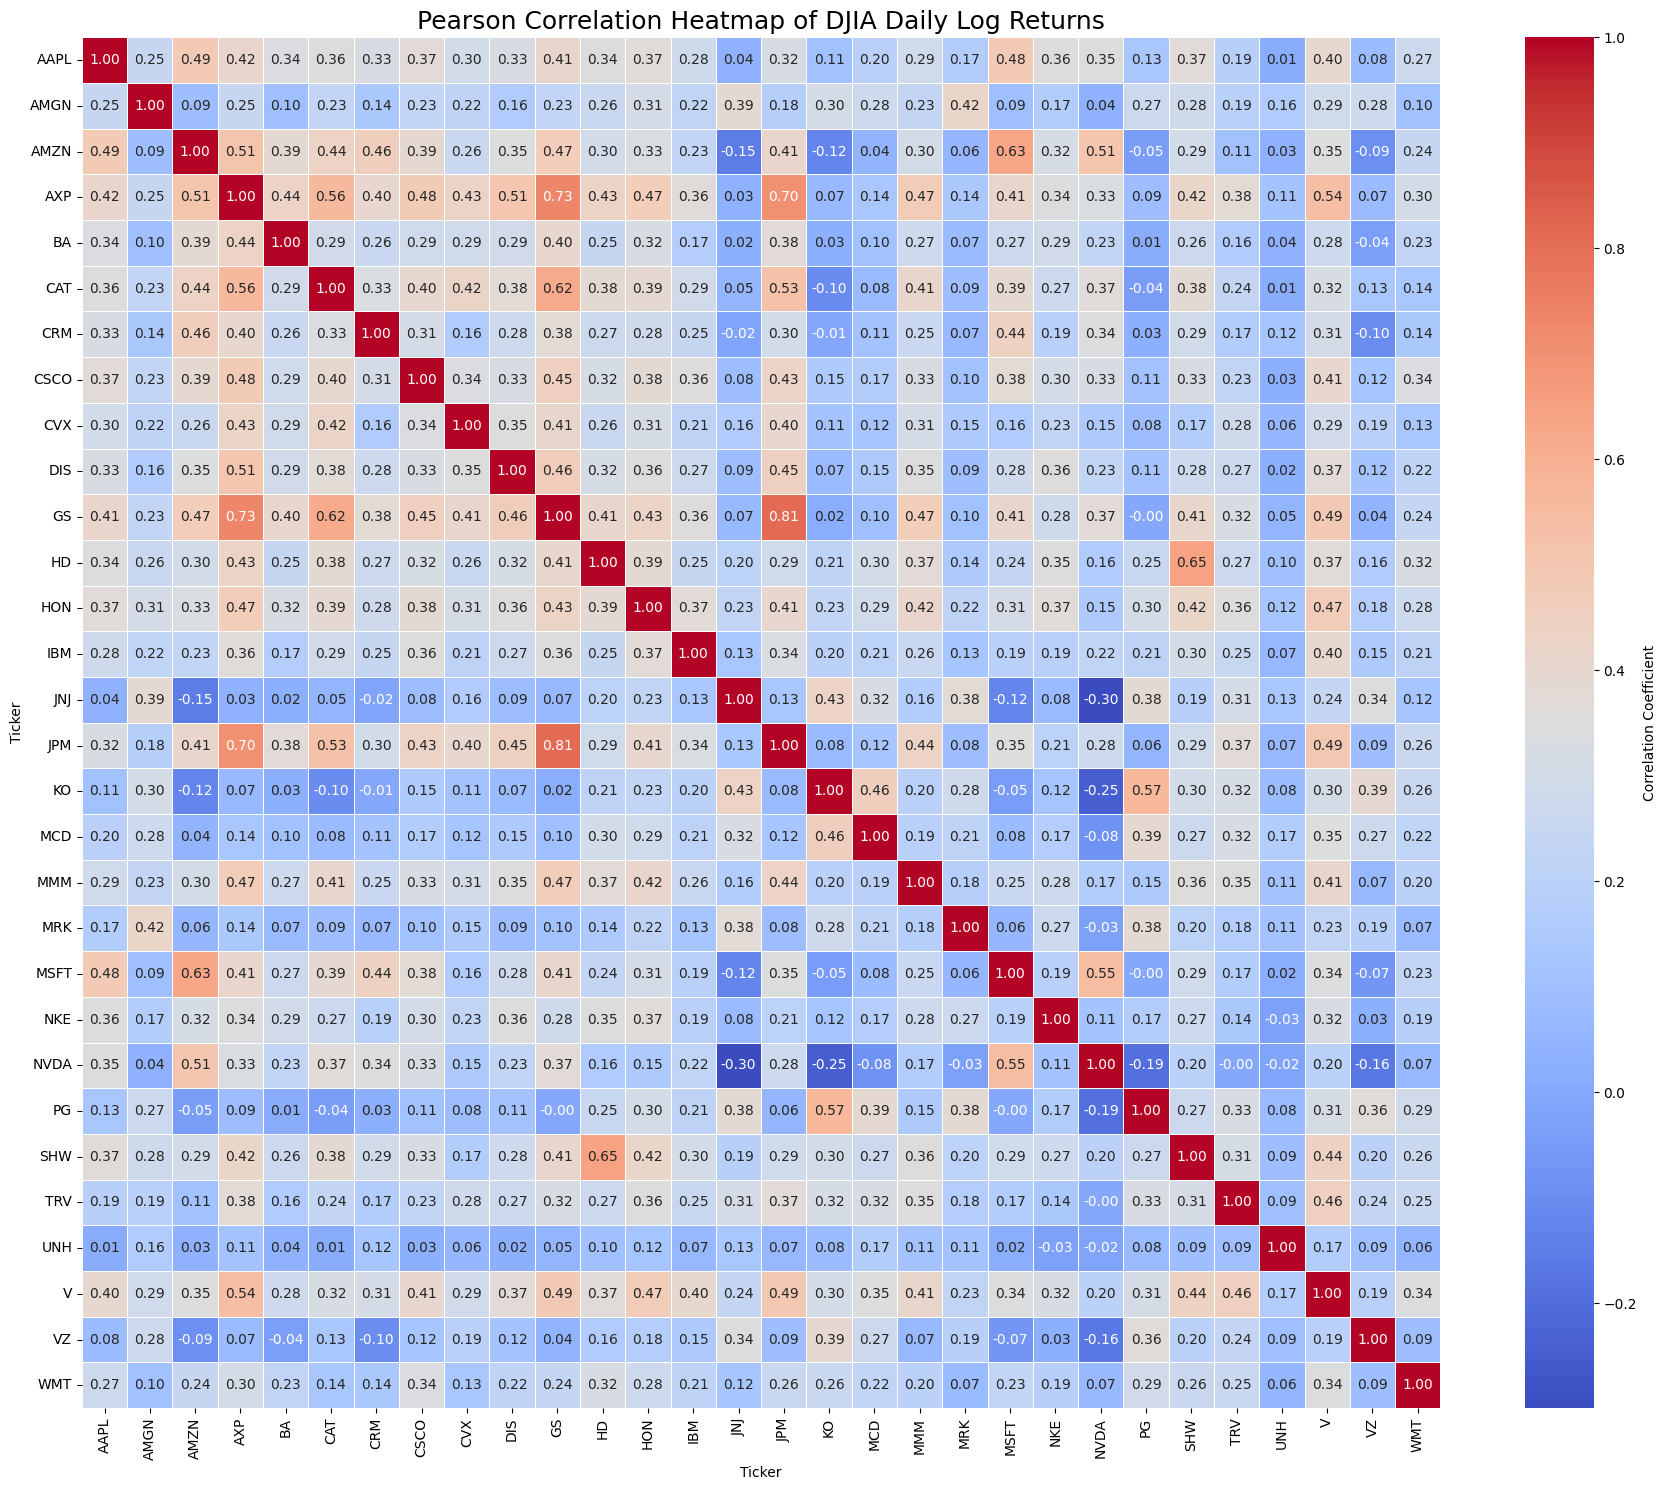

In [ ]:
# 4. Plot the correlation heatmap for better visualization and explain your findings

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Pearson Correlation Heatmap of DJIA Daily Log Returns', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 1.3 Eigendecomposition/PCA
#scaling

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_returns = scaler.fit_transform(log_returns)
scaled_returns_df = pd.DataFrame(scaled_returns, index=log_returns.index, columns=log_returns.columns)

In [ ]:
# Perform PCA

pca = PCA(n_components=None)
pca.fit(scaled_returns_df)

PCA()

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=log_returns.columns)

In [ ]:
# Eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio for each Principal Component:")
print(pd.Series(explained_variance_ratio, index=[f'PC{i+1}' for i in range(pca.n_components_)]).head(5))


Explained Variance Ratio for each Principal Component:
PC1    0.288446
PC2    0.119595
PC3    0.048740
PC4    0.040403
PC5    0.037941
dtype: float64


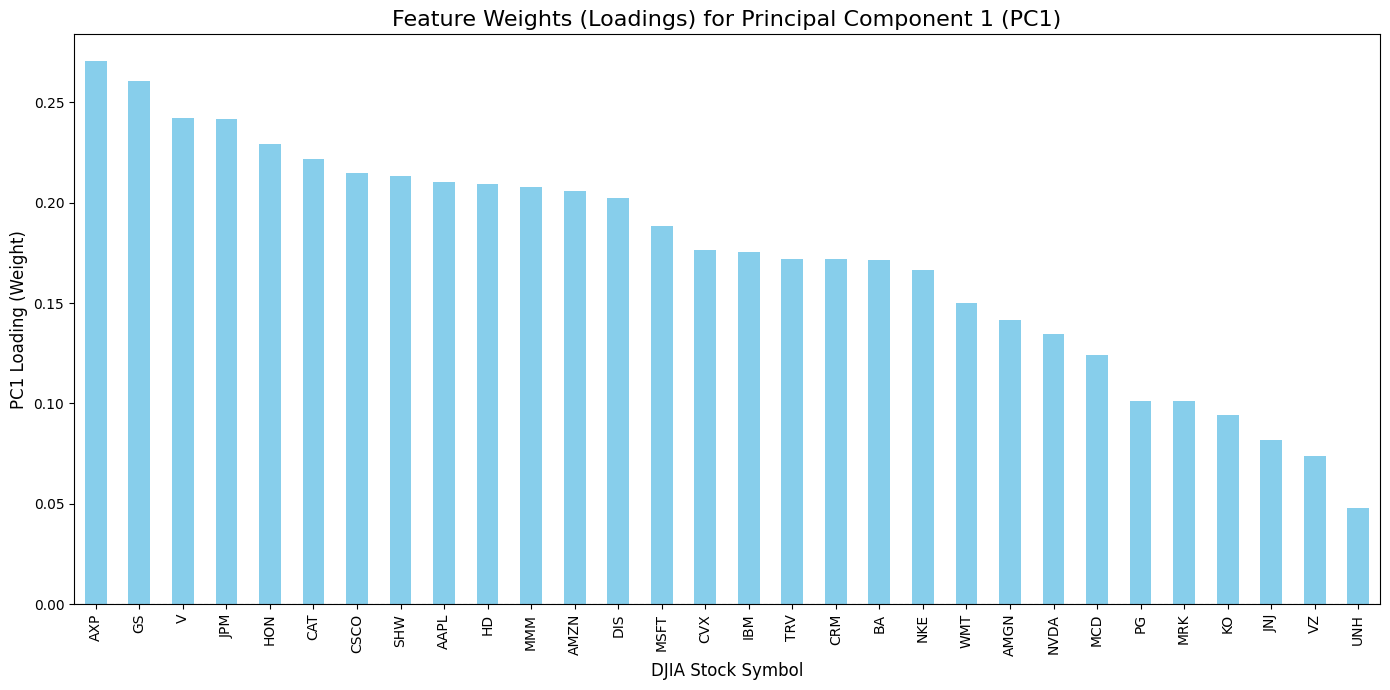

In [ ]:
# PC1 Loadings Bar Chart
plt.figure(figsize=(14, 7))
loadings['PC1'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Weights (Loadings) for Principal Component 1 (PC1)', fontsize=16)
plt.xlabel('DJIA Stock Symbol', fontsize=12)
plt.ylabel('PC1 Loading (Weight)', fontsize=12)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

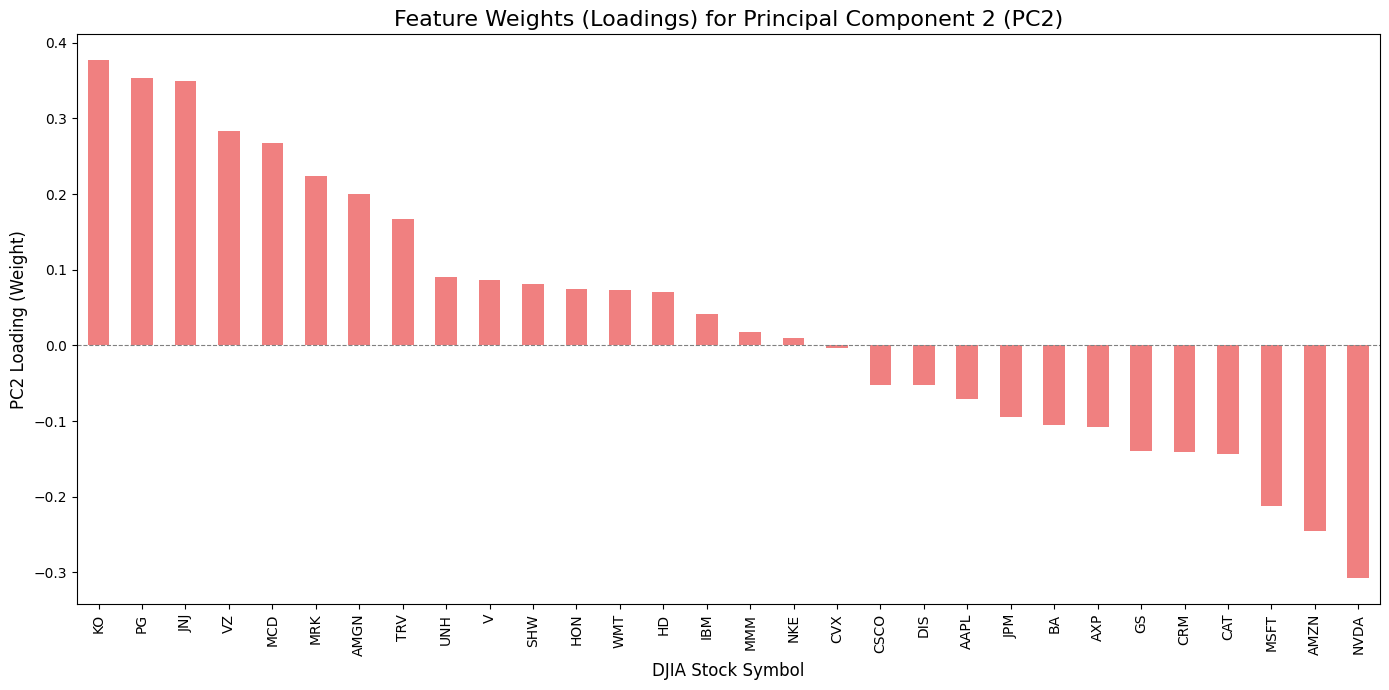

In [ ]:
# PC2 Loadings Bar Chart
plt.figure(figsize=(14, 7))
loadings['PC2'].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Feature Weights (Loadings) for Principal Component 2 (PC2)', fontsize=16)
plt.xlabel('DJIA Stock Symbol', fontsize=12)
plt.ylabel('PC2 Loading (Weight)', fontsize=12)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 1.4 Perform a variance decomposition analysis
# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
num_components = len(explained_variance_ratio)
components_labels = [f'PC{i+1}' for i in range(num_components)]
print("\nPercentage of variance explained by each Principal Component (top 10):")
for i in range(min(10, num_components)):
    print(f"{components_labels[i]}: {explained_variance_ratio[i]*100:.2f}%")


Percentage of variance explained by each Principal Component (top 10):
PC1: 28.84%
PC2: 11.96%
PC3: 4.87%
PC4: 4.04%
PC5: 3.79%
PC6: 3.39%
PC7: 3.30%
PC8: 2.87%
PC9: 2.72%
PC10: 2.64%


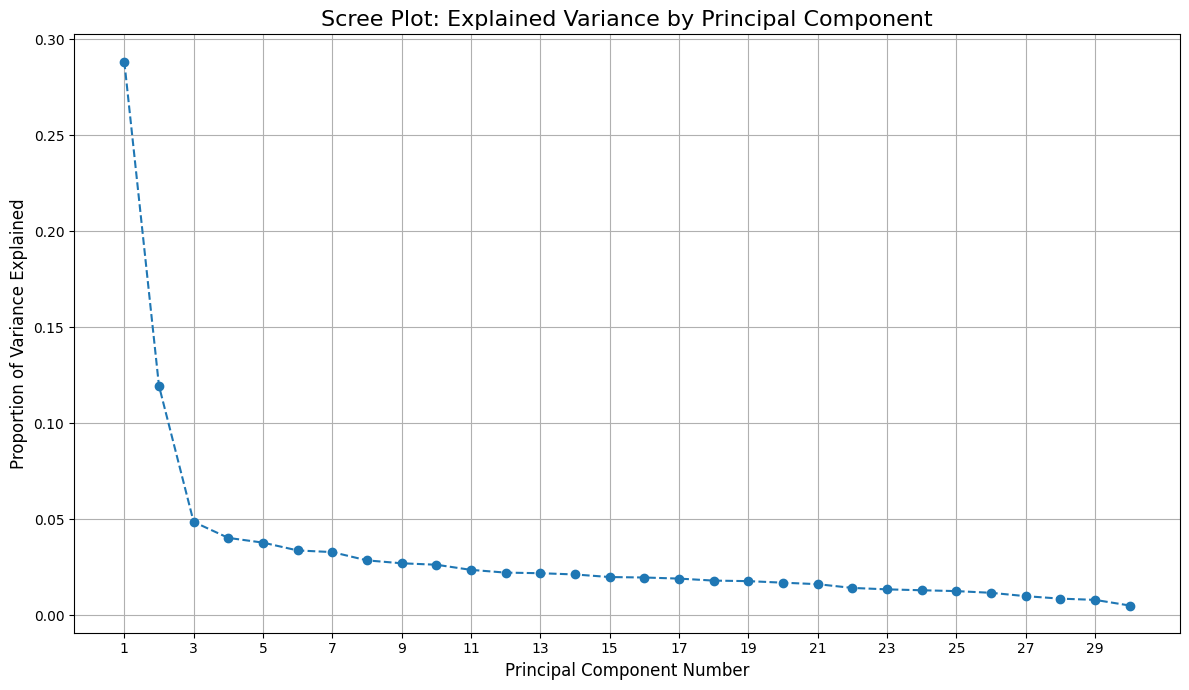

In [ ]:
# Scree plot
plt.figure(figsize=(12, 7))
plt.plot(range(1, num_components + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot: Explained Variance by Principal Component', fontsize=16)
plt.xlabel('Principal Component Number', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(1, num_components + 1, 2)) # Show ticks for every other component
plt.tight_layout()
plt.show()

In [ ]:
# Compute cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance (top 10):")
for i in range(min(10, num_components)):
    print(f"Up to {components_labels[i]}: {cumulative_explained_variance[i]*100:.2f}%")

# Determine dimensionality k required to preserve 95% of information
k = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1 # +1 because array index is 0-based

print(f"\nNumber of principal components required to explain 95% of the variance (k): {k}")
print(f"Cumulative variance explained by {k} components: {cumulative_explained_variance[k-1]*100:.2f}%")



Cumulative Explained Variance (top 10):
Up to PC1: 28.84%
Up to PC2: 40.80%
Up to PC3: 45.68%
Up to PC4: 49.72%
Up to PC5: 53.51%
Up to PC6: 56.90%
Up to PC7: 60.20%
Up to PC8: 63.07%
Up to PC9: 65.79%
Up to PC10: 68.43%

Number of principal components required to explain 95% of the variance (k): 25
Cumulative variance explained by 25 components: 95.60%


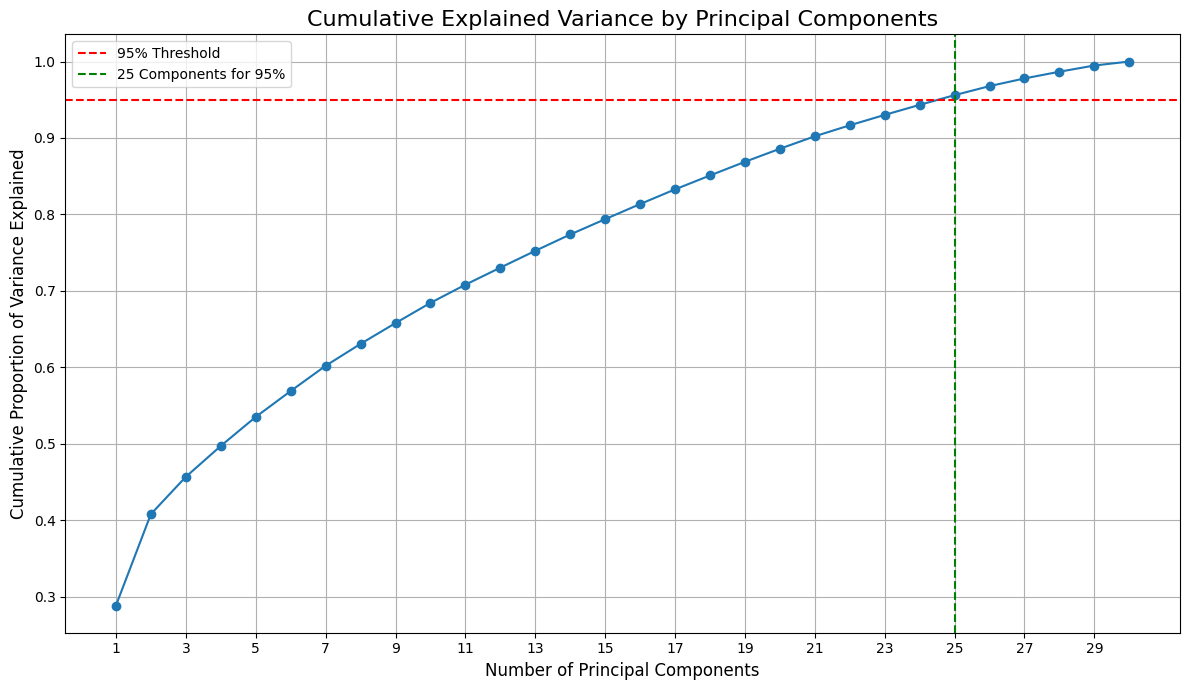

In [ ]:

# Create a cumulative explained variance plot
plt.figure(figsize=(12, 7))
plt.plot(range(1, num_components + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance Explained', fontsize=12)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axvline(x=k, color='g', linestyle='--', label=f'{k} Components for 95%')
plt.grid(True)
plt.xticks(np.arange(1, num_components + 1, 2))
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1800x1800 with 0 Axes>

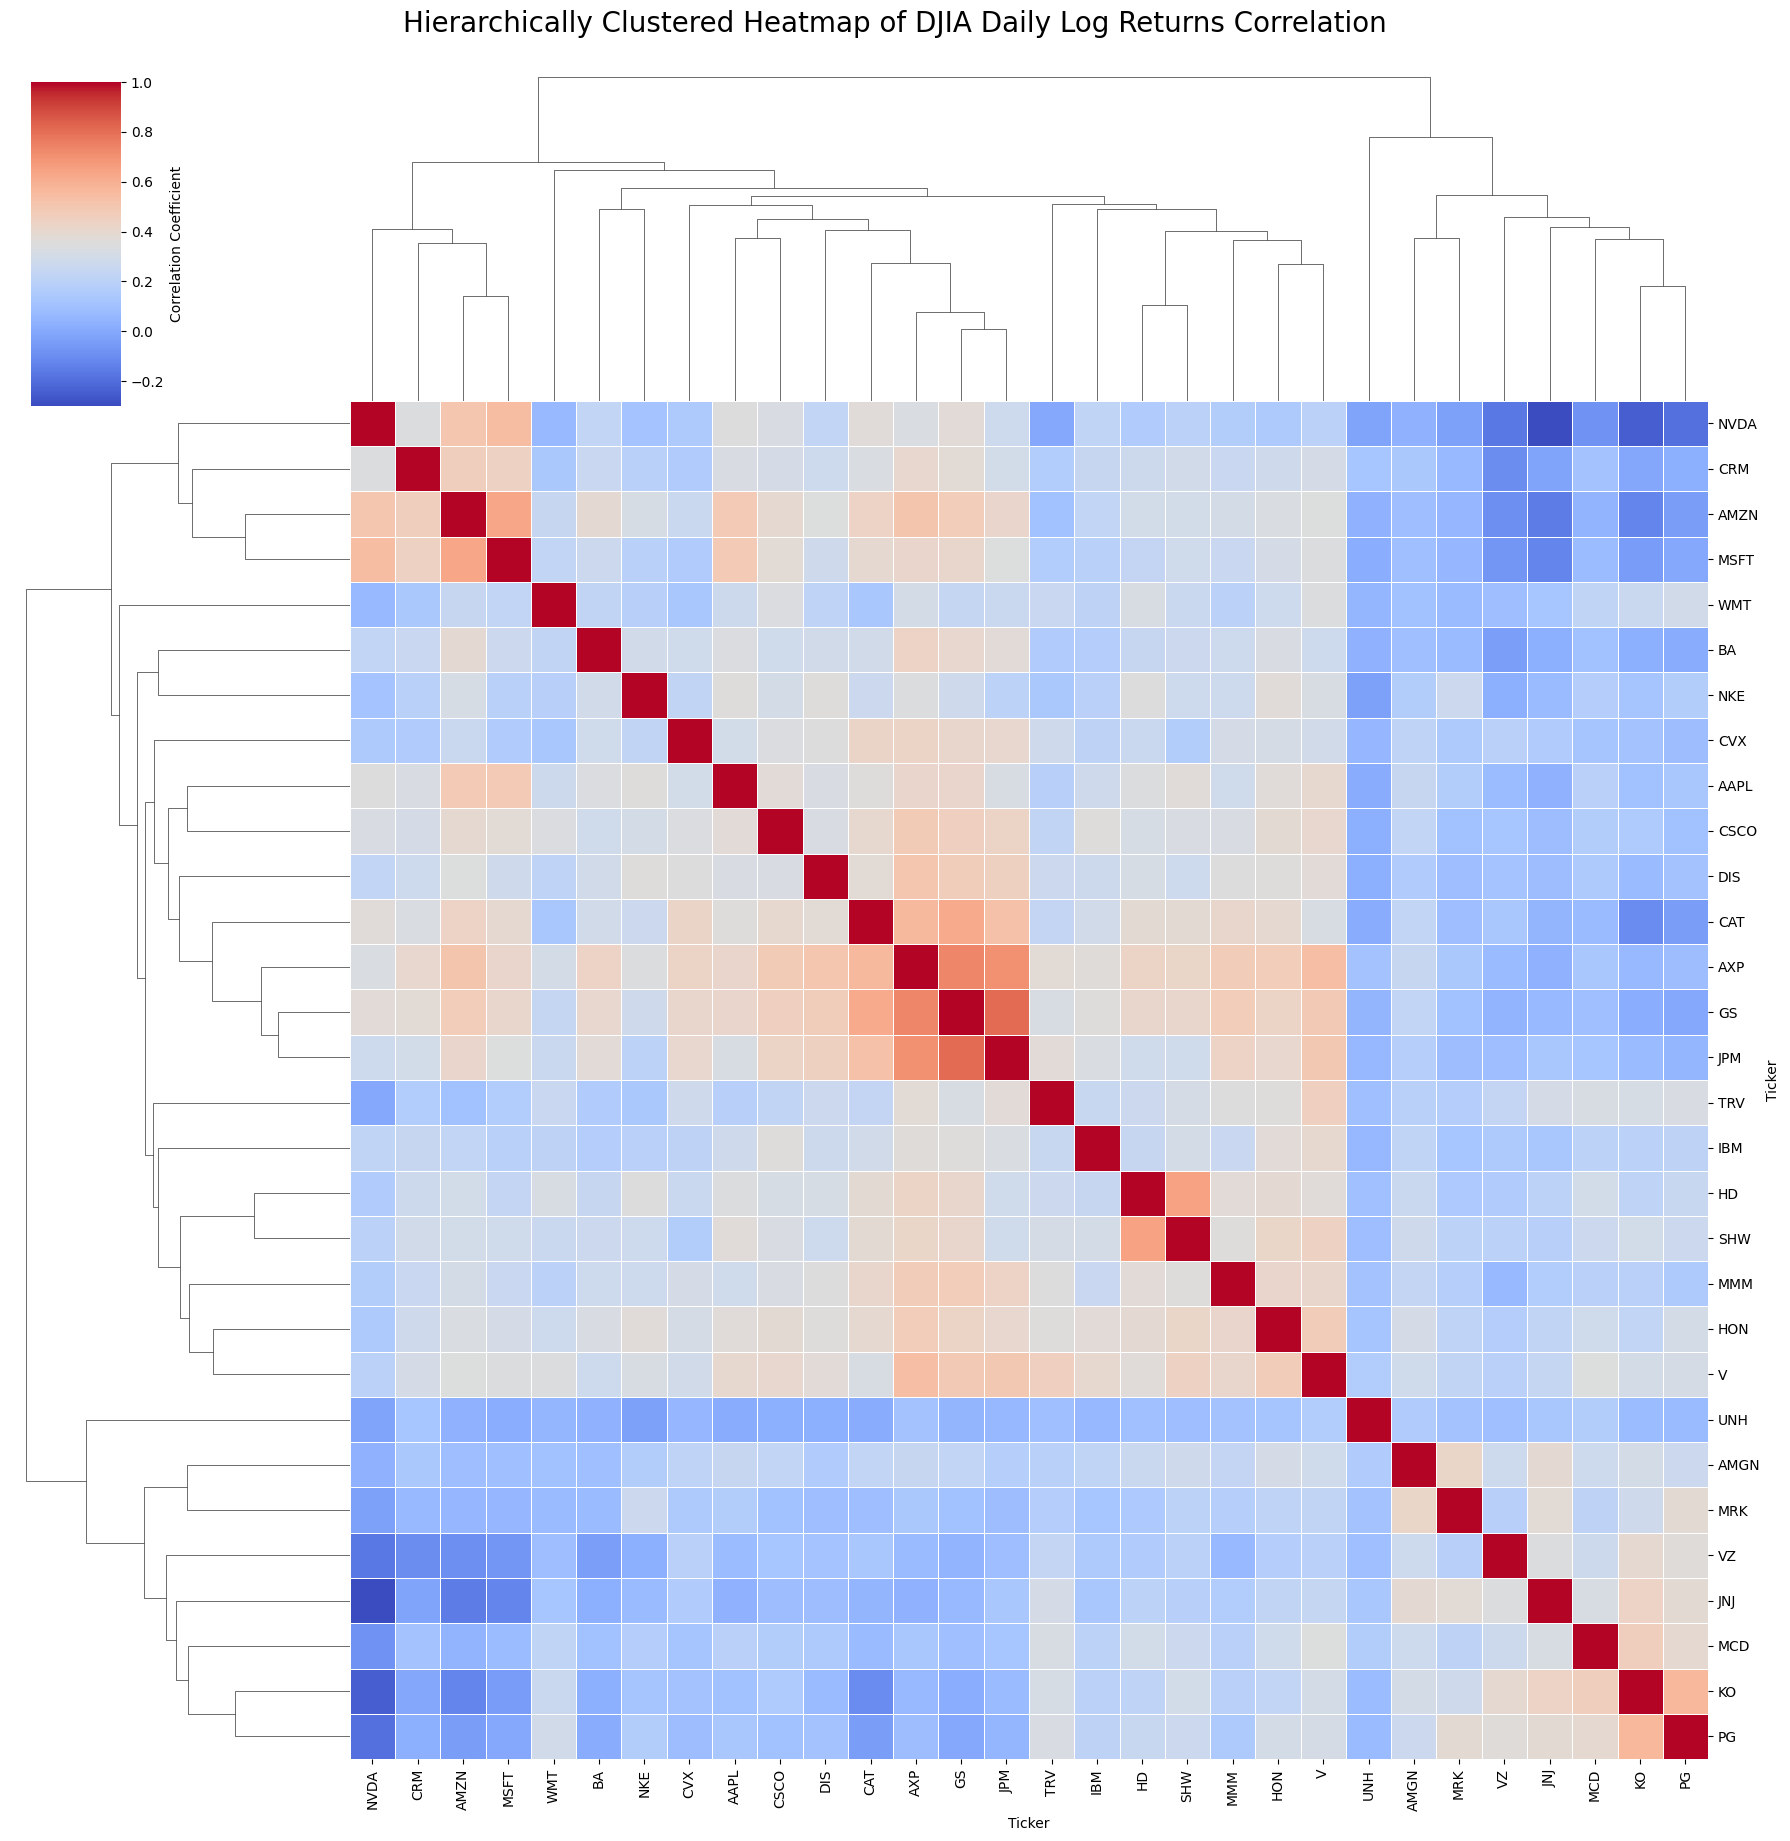

In [ ]:
# 2.2 Construct a hierarchically clustered heatmap

plt.figure(figsize=(18, 18))
clustermap = sns.clustermap(
    correlation_matrix,
    method='average',    # Linkage method
    metric='euclidean',  # Metric for clustering, 'correlation' would use 1-r, euclidean on (1-r) data is similar
    cmap='coolwarm',
    annot=False,         # Set to False for better visibility with many stocks
    fmt=".2f",
    linewidths=.5,
    figsize=(18, 18),
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.suptitle('Hierarchically Clustered Heatmap of DJIA Daily Log Returns Correlation', y=1.02, fontsize=20)
plt.setp(clustermap.ax_heatmap.get_xticklabels(), rotation=90)
plt.setp(clustermap.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

In [ ]:
# 2.3
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster

In [ ]:
# ● Compute pairwise distance from the correlation matrix (it should be a labeled matrix)
labeled_distance_matrix = 1 - correlation_matrix
print("\nLabeled Distance Matrix (1 - Correlation):")
labeled_distance_matrix.head()


Labeled Distance Matrix (1 - Correlation):


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,0.753961,0.514693,0.584226,0.662816,0.643398,0.670629,0.627116,0.702393,0.670664,...,0.515567,0.640973,0.649238,0.866930,0.634267,0.813444,0.986075,0.602459,0.920650,0.726429
AMGN,0.753961,0.000000,0.910128,0.754644,0.904848,0.768426,0.858251,0.770081,0.784529,0.842461,...,0.908132,0.827410,0.964383,0.733813,0.717231,0.810552,0.838147,0.712912,0.724121,0.895085
AMZN,0.514693,0.910128,0.000000,0.489967,0.612733,0.564348,0.542232,0.606875,0.738320,0.653897,...,0.367642,0.684867,0.494516,1.045566,0.705429,0.893626,0.966224,0.653461,1.094417,0.755014
AXP,0.584226,0.754644,0.489967,0.000000,0.563514,0.436927,0.598782,0.518992,0.573120,0.492883,...,0.585493,0.658747,0.665070,0.914700,0.580858,0.620865,0.888442,0.457098,0.928478,0.698649
BA,0.662816,0.904848,0.612733,0.563514,0.000000,0.708254,0.741441,0.710628,0.714623,0.708817,...,0.733604,0.706629,0.768942,0.987196,0.735346,0.839263,0.961102,0.721251,1.039714,0.772948


In [ ]:
# ● Computing the linkage matrix by using the average method and euclidean as a metrics
linkage_matrix = linkage(log_returns.T, method='average', metric='euclidean')
print("\nLinkage Matrix (first 5 rows):")
print(linkage_matrix[:5])


Linkage Matrix (first 5 rows):
[[16.         23.          0.21546031  2.        ]
 [10.         15.          0.2372484   2.        ]
 [14.         30.          0.2606891   3.        ]
 [11.         24.          0.2700785   2.        ]
 [17.         32.          0.27244503  4.        ]]


In [ ]:
# ● Classifying the linkage matrix into 4 clusters (Hint: You can use fcluster from scipy library)
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
cluster_df = pd.DataFrame({'Symbol': log_returns.columns, 'Cluster': clusters})
print(f"\nStocks classified into {num_clusters} clusters:")
cluster_df.sort_values('Cluster').head()


Stocks classified into 4 clusters:


,Symbol,Cluster
0,AAPL,1
1,AMGN,1
2,AMZN,1
3,AXP,1
4,BA,1


In [ ]:
# PCA for plotting
pca = PCA(n_components=2)
principal_components = pca.fit_transform(log_returns.T)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=log_returns.columns)
pca_df['Cluster'] = clusters

/tmp/ipython-input-374510427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), textcoords="offset points", xytext=(0,5), ha='center')


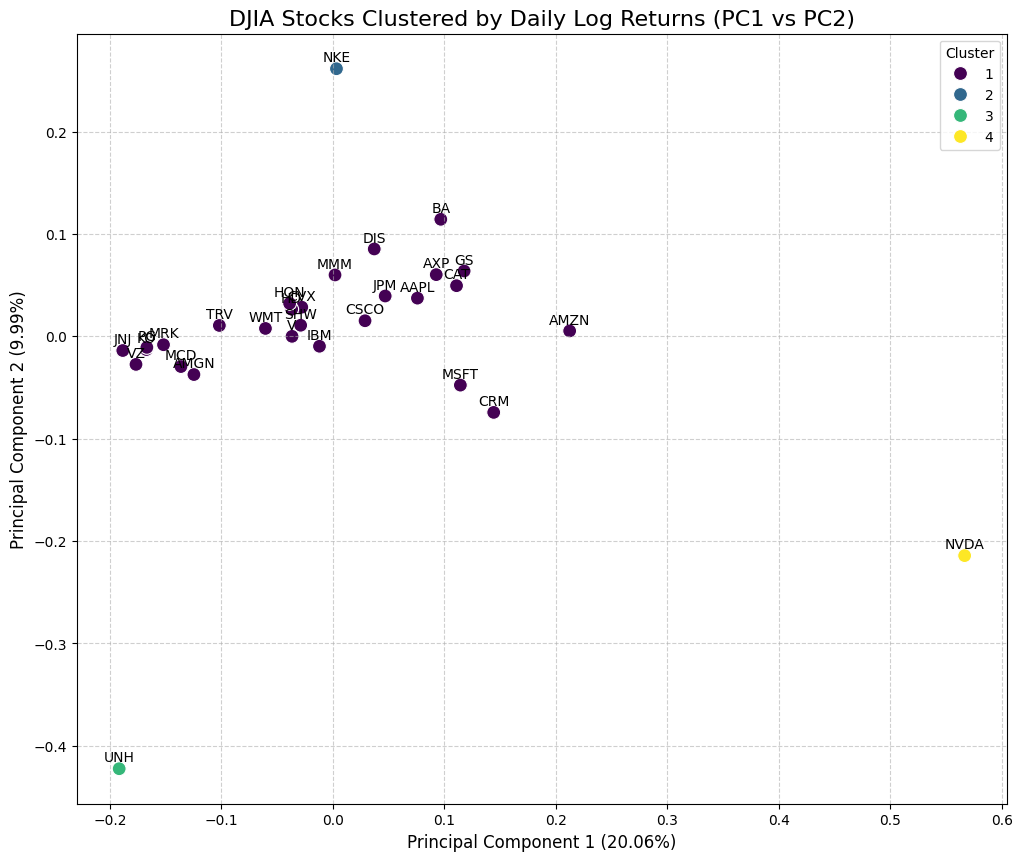

In [ ]:
# ●scatter plot of PC1 against PC2, coloring and labeling the indexes using the 4 clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, legend='full')
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('DJIA Stocks Clustered by Daily Log Returns (PC1 vs PC2)', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# ● the stocks that are members of each of the four clusters and provide a detailed description of each cluster
cluster_members = cluster_df.groupby('Cluster')['Symbol'].apply(list)
print("Cluster Members and Descriptions ")
for i, members in cluster_members.items():
    print(f"\nCluster {i}:")
    print(f"  Members: {', '.join(members)}")

Cluster Members and Descriptions 

Cluster 1:
  Members: AAPL, AMGN, AMZN, AXP, BA, CAT, CRM, CSCO, CVX, DIS, GS, HD, HON, IBM, JNJ, JPM, KO, MCD, MMM, MRK, MSFT, PG, SHW, TRV, V, VZ, WMT

Cluster 2:
  Members: NKE

Cluster 3:
  Members: UNH

Cluster 4:
  Members: NVDA


QESTION 3

In [ ]:
# 3.1
# Define necessary variables first
oldest_djia_symbol = "PG" # Procter & Gamble, a historically very old component
end_date = datetime.now()
start_date_long = end_date - timedelta(days=50 * 365) # Extend for long-term oldest stock

In [ ]:
# ● Using the data from 1.2 to identify the oldest index and extract its monthly closing prices
oldest_stock_data = yf.download(oldest_djia_symbol, start=start_date_long, end=end_date, progress=False)


/tmp/ipython-input-1340596649.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  oldest_stock_data = yf.download(oldest_djia_symbol, start=start_date_long, end=end_date, progress=False)


In [ ]:
# Resample to monthly closing prices (end of month)
monthly_prices = oldest_stock_data.resample('M').last()
monthly_prices.head()

/tmp/ipython-input-3787206146.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = oldest_stock_data.resample('M').last()


Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
1975-12-31,0.665528,0.673006,0.665528,0.671136,864000
1976-01-31,0.691621,0.695380,0.684103,0.685983,2995200
1976-02-29,0.638059,0.641818,0.632421,0.638059,1068800
1976-03-31,0.680344,0.680344,0.673766,0.676585,976000
1976-04-30,0.671297,0.674134,0.667515,0.669406,332800


<Figure size 1400x700 with 0 Axes>

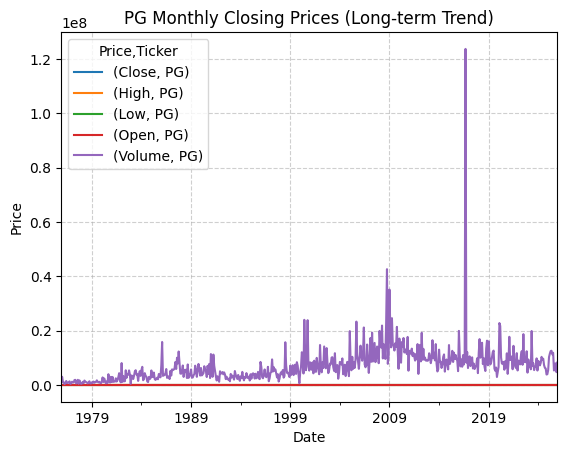

In [ ]:
# ● Provide relevant visualizations to explore trends, and behaviour of the index

# Monthly Line Plot
plt.figure(figsize=(14, 7))
monthly_prices.plot(title=f'{oldest_djia_symbol} Monthly Closing Prices (Long-term Trend)')
plt.xlabel('Date'); plt.ylabel('Price'); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

<Figure size 1400x700 with 0 Axes>

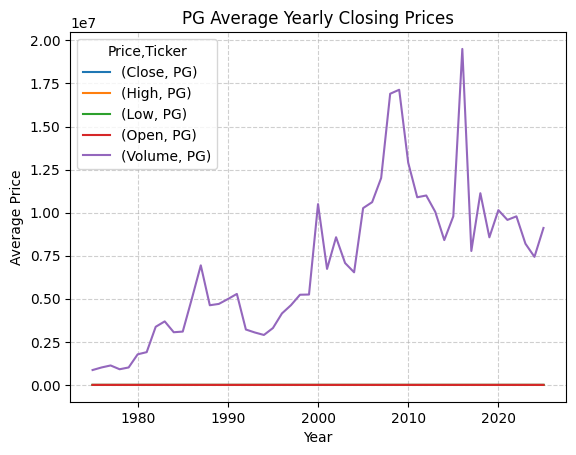

In [ ]:
# Yearly Line Plot (average monthly price per year)
plt.figure(figsize=(14, 7))
monthly_prices.groupby(monthly_prices.index.year).mean().plot(kind='line', title=f'{oldest_djia_symbol} Average Yearly Closing Prices')
plt.xlabel('Year'); plt.ylabel('Average Price'); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

/tmp/ipython-input-1903479038.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  monthly_prices.hist(ax=axes[0], bins=30, color='skyblue', edgecolor='black')
/tmp/ipython-input-1903479038.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  np.log(monthly_prices).hist(ax=axes[1], bins=30, color='lightcoral', edgecolor='black')


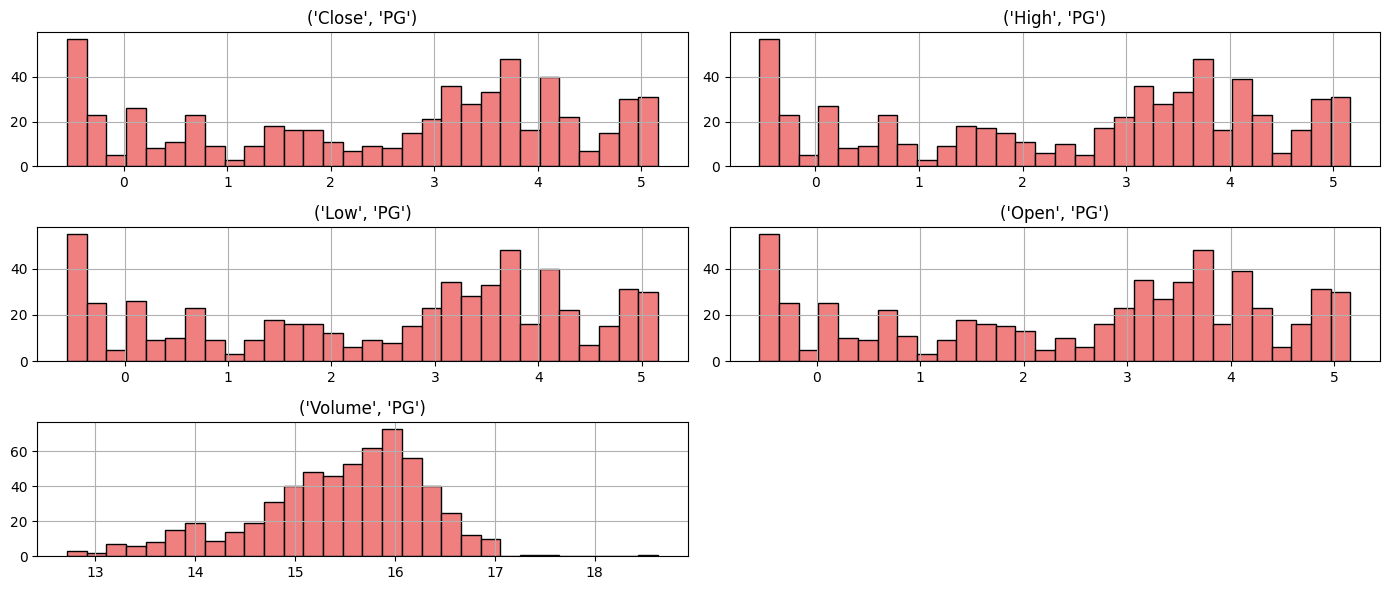

In [ ]:
# Histograms for Prices and Log Prices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
monthly_prices.hist(ax=axes[0], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title(f'{oldest_djia_symbol} Monthly Prices Histogram')
np.log(monthly_prices).hist(ax=axes[1], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title(f'{oldest_djia_symbol} Monthly Log Prices Histogram')
plt.tight_layout(); plt.show()

<Figure size 1400x700 with 0 Axes>

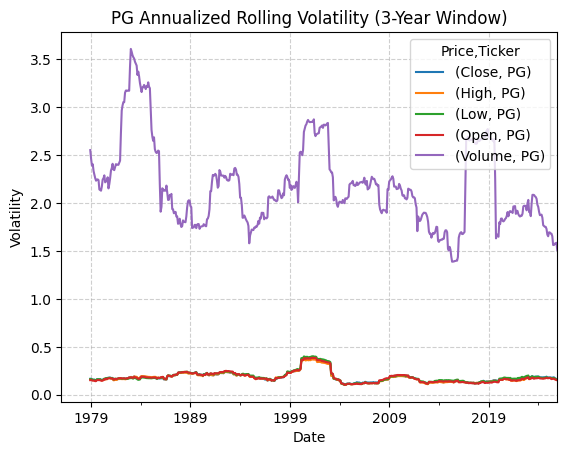

In [ ]:
# Rolling Volatility (3-year window = 36 months)
monthly_log_returns = np.log(monthly_prices / monthly_prices.shift(1)).dropna()
rolling_volatility = monthly_log_returns.rolling(window=36).std() * np.sqrt(12)
plt.figure(figsize=(14, 7))
rolling_volatility.plot(title=f'{oldest_djia_symbol} Annualized Rolling Volatility (3-Year Window)')
plt.xlabel('Date'); plt.ylabel('Volatility'); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

In [ ]:
# ● Perform the Augmented Dickey–Fuller (ADF) test to assess stationarity
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(monthly_prices['Close']) # Select the 'Close' column
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 2.3342886649846646
p-value: 0.9989759494721595
Critical Values:
   1%: -3.4415584920942424
   5%: -2.866484781324317
   10%: -2.569403436033035


In [ ]:
# ● If the series is non-stationary, apply appropriate differencing and re-evaluate stationarity, 1st differencing
monthly_prices_diff1 = monthly_prices['Close'].diff(1).dropna()
print("ADF Test for 1st Differenced Monthly Prices")
adf_result_diff1 = adfuller(monthly_prices_diff1) # monthly_prices_diff1 is now a Series
print(f'ADF Statistic (1st diff): {adf_result_diff1[0]}')
print(f'p-value (1st diff): {adf_result_diff1[1]}')
print('Critical Values:')
for key, value in adf_result_diff1[4].items():
    print(f'   {key}: {value}')

ADF Test for 1st Differenced Monthly Prices
ADF Statistic (1st diff): -6.433185047864465
p-value (1st diff): 1.6776218358288204e-08
Critical Values:
   1%: -3.44152019959894
   5%: -2.8664679191981297
   10%: -2.569394451038919


<Figure size 1400x700 with 0 Axes>

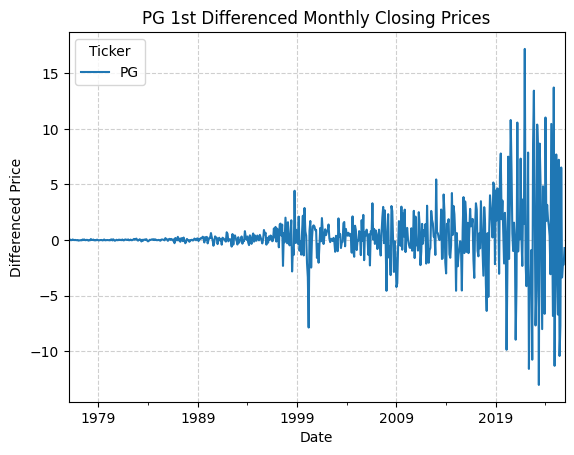

In [ ]:
# Visualize 1st Differenced Series
plt.figure(figsize=(14, 7))
monthly_prices_diff1.plot(title=f'{oldest_djia_symbol} 1st Differenced Monthly Closing Prices')
plt.xlabel('Date'); plt.ylabel('Differenced Price'); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

In [ ]:
#3.2
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller # For pre-computation

<Figure size 1200x800 with 0 Axes>

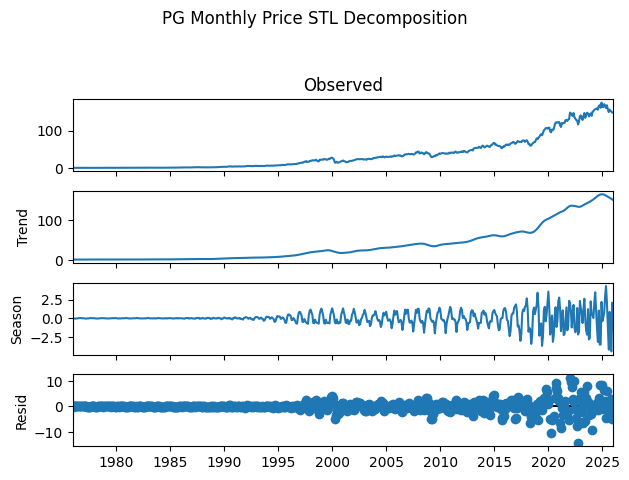

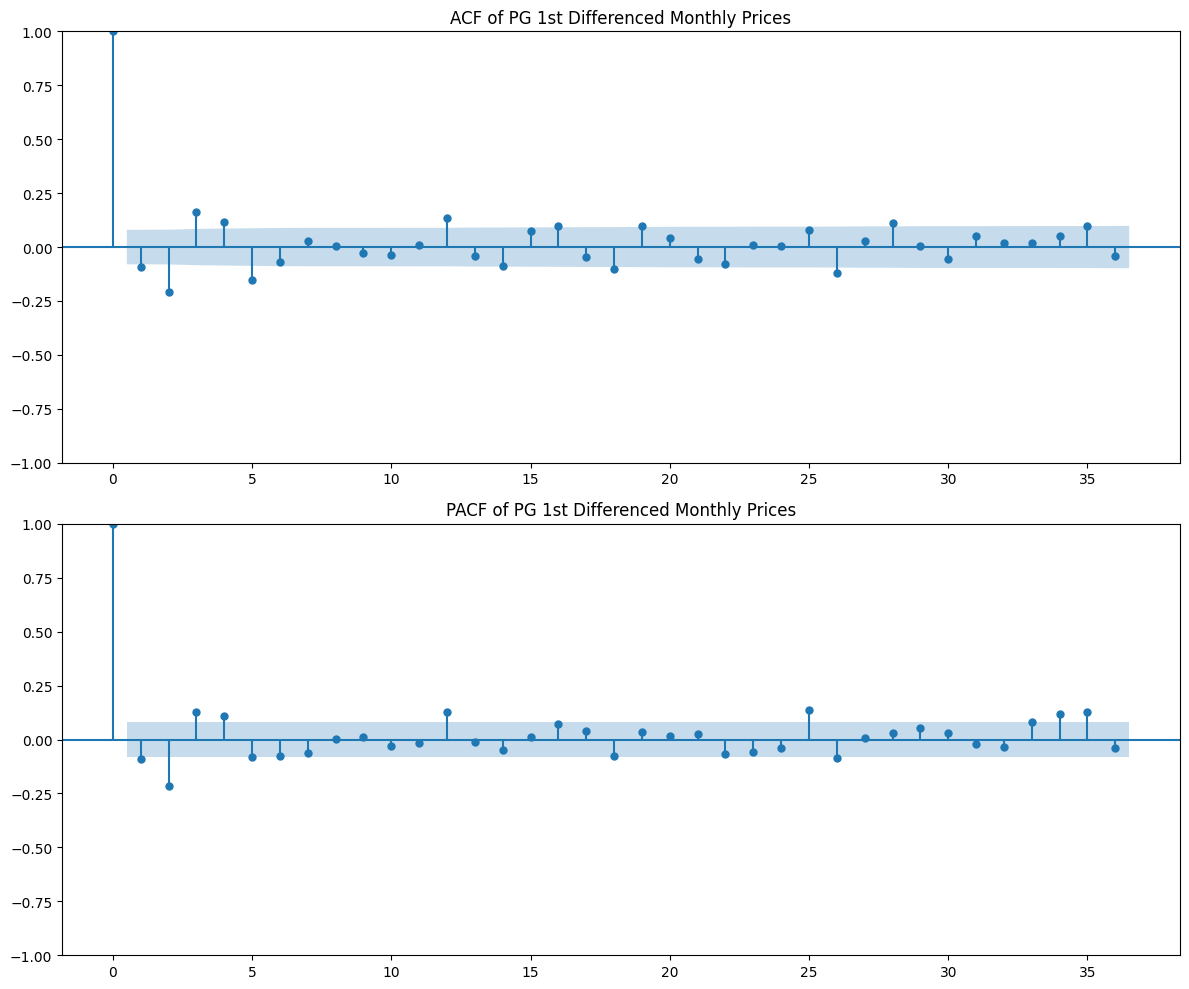

In [ ]:
# Time Series Decomposition (STL)
stl = STL(monthly_prices['Close'], seasonal=13, period=12) # seasonal=13 means an odd integer > 1
result = stl.fit()

plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle(f'{oldest_djia_symbol} Monthly Price STL Decomposition', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# ACF and PACF plots for the 1st differenced series (from 3.1)
monthly_prices_diff1 = monthly_prices['Close'].diff(1).dropna()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(monthly_prices_diff1, lags=36, ax=axes[0], title=f'ACF of {oldest_djia_symbol} 1st Differenced Monthly Prices')
plot_pacf(monthly_prices_diff1, lags=36, ax=axes[1], title=f'PACF of {oldest_djia_symbol} 1st Differenced Monthly Prices')
plt.tight_layout(); plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # ARIMA model for time series forecasting
from sklearn.metrics import mean_absolute_error, mean_squared_error # Metrics for evaluating model performance
from sklearn.preprocessing import MinMaxScaler # Scaler for normalizing data
from tensorflow.keras.models import Sequential # Keras model type for stacking layers
from tensorflow.keras.layers import LSTM, Dense # LSTM and Dense layers for neural networks

In [ ]:
# Data Splitting
test_months = 36 # Define the number of months for the test set (3 years)
train_data = monthly_prices[:-test_months] # Training data excludes the last 'test_months'
test_data = monthly_prices[-test_months:] # Test data consists of the last 'test_months'

In [ ]:
# Store predictions and actuals for comparison
predictions = {} # Dictionary to store predictions from different models
actuals = test_data.copy() # Copy of test data for actual values comparison

print(f"Training data length: {len(train_data)} months") # Print the length of the training data
print(f"Test data length: {len(test_data)} months") # Print the length of the test data

Training data length: 565 months
Test data length: 36 months


In [ ]:
# 1. Simple Moving Average (MA) Model
ma_window = 12
ma_predictions = []
history_ma = list(train_data.values)
for t in range(len(test_data)):
    model_input = history_ma[-ma_window:]
    yhat = np.mean(model_input)
    ma_predictions.append(yhat)
    history_ma.append(test_data.iloc[t])

predictions['MA'] = pd.Series(ma_predictions, index=test_data.index)
print("MA Model Training Complete.")

MA Model Training Complete.


In [ ]:
# 2. ARIMA/SARIMA Model
order = (1, 1, 1)
arima_predictions = []
history_arima = list(train_data['Close'].values)

for t in range(len(test_data)):
    model = ARIMA(history_arima, order=order)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=1)[0]
    arima_predictions.append(yhat)
    history_arima.append(test_data['Close'].iloc[t])

predictions['ARIMA'] = pd.Series(arima_predictions, index=test_data.index) # Store ARIMA predictions as a pandas Series
print("ARIMA Model Training Complete.") # Indicate completion of ARIMA model training

ARIMA Model Training Complete.


In [ ]:
#3. LSTM Neural Network
# 1. Normalization: Scale data to a range to improve training stability and speed.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_prices.values.reshape(-1, 1))

# 2. Create supervised dataset: Transform time series into input-output pairs (X, y).
train_scaled = scaled_data[:-test_months]
test_scaled = scaled_data[-test_months:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 12 # Define the number of past time steps to use as input for LSTM
X_train, y_train = create_dataset(train_scaled, look_back) # Create training dataset
X_test, y_test = create_dataset(test_scaled, look_back) # Create test dataset (for evaluation, though not directly used in walk-forward here)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshape training input for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Reshape test input for LSTM


Training Samples: 565
Test Samples: 36
Data Type: float64

Running Moving Average Model...
Running ARIMA Model (this may take a moment)...
Running LSTM Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Model Performance (Last 3 Years) ---
Moving Average -> RMSE: 9.9607 | MAE: 8.7746
ARIMA(1,1,1) -> RMSE: 6.9249 | MAE: 5.7051
LSTM -> RMSE: 6.9580 | MAE: 5.7675


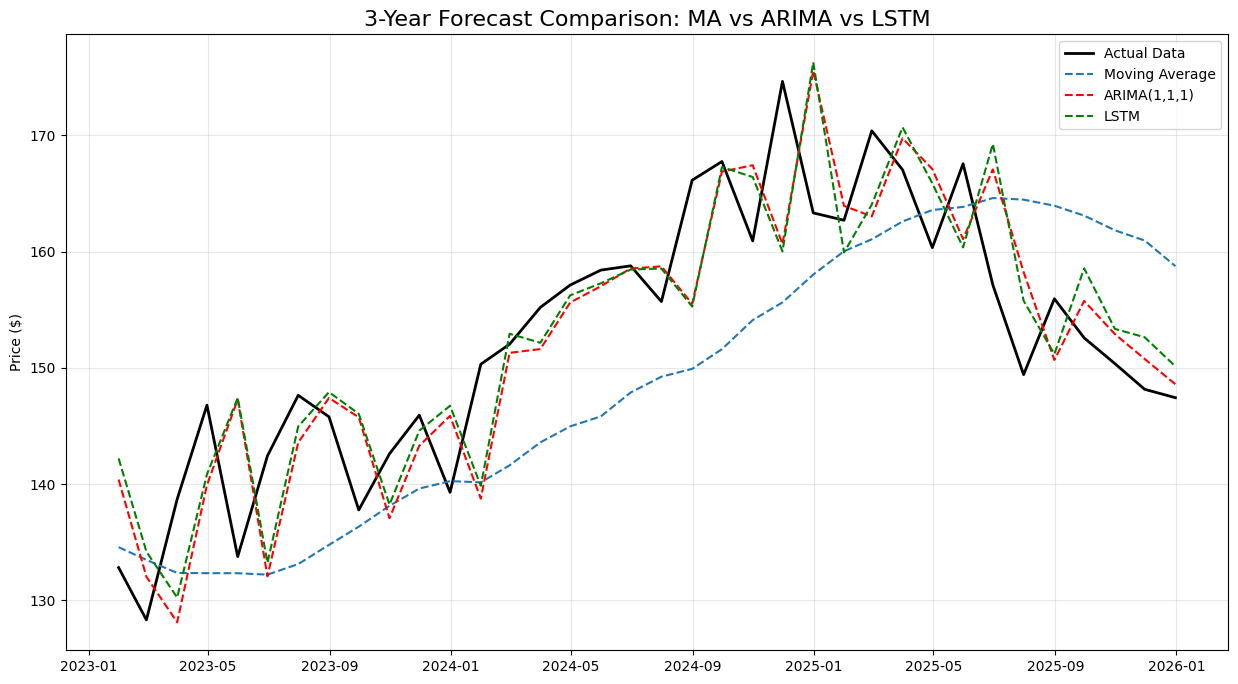


Best Model selected for Future Forecast: ARIMA


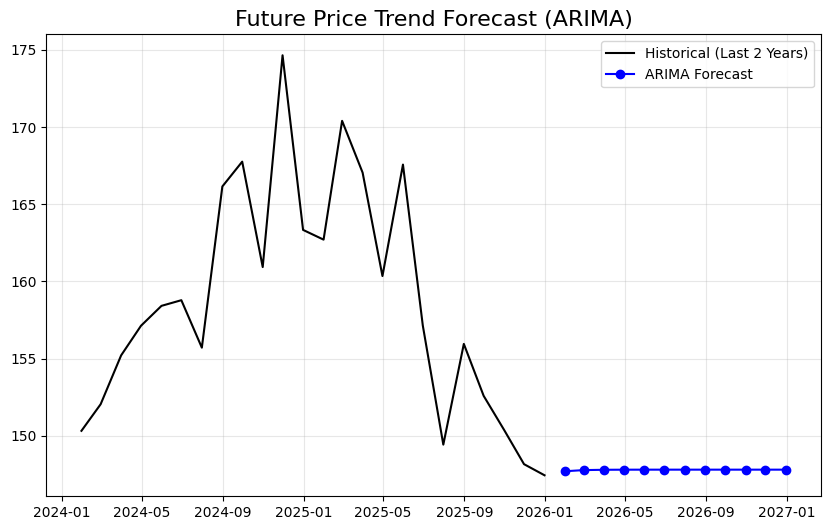


Future Forecast Values:
2026-01-31: $147.70
2026-02-28: $147.77
2026-03-31: $147.80
2026-04-30: $147.80
2026-05-31: $147.80
2026-06-30: $147.80
2026-07-31: $147.80
2026-08-31: $147.80
2026-09-30: $147.80
2026-10-31: $147.80
2026-11-30: $147.80
2026-12-31: $147.80


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ==========================================
# 1. DATA PREPARATION (Corrected)
# ==========================================
# Ensure 'series' is strictly a numeric Series, not a DataFrame
# The 'Close' column from monthly_prices DataFrame is the time series data.
data = monthly_prices[('Close', oldest_djia_symbol)].copy()

# Force conversion to float to prevent any string/object errors
data = data.astype(float)

# Split: Last 36 months as Test, rest as Train
test_size = 36
train = data[:-test_size]
test = data[-test_size:]

print(f"Training Samples: {len(train)}")
print(f"Test Samples: {len(test)}")
print(f"Data Type: {data.dtype}") # Should be float64

# ==========================================
# 2. MODEL 1: SIMPLE MOVING AVERAGE (MA)
# ==========================================
history_ma = train.tolist() # Convert to standard python list of floats
ma_predictions = []

print("\nRunning Moving Average Model...")
for t in range(len(test)):
    # Predict using mean of last 12 months
    yhat = np.mean(history_ma[-12:])
    ma_predictions.append(yhat)
    # Add actual observation to history for next step
    history_ma.append(test.iloc[t])

# ==========================================
# 3. MODEL 2: ARIMA (1,1,1)
# ==========================================
history_arima = train.tolist()
arima_predictions = []

print("Running ARIMA Model (this may take a moment)...")
for t in range(len(test)):
    # Fit model on current history
    try:
        model = ARIMA(history_arima, order=(1,1,1))
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=1)[0]
    except:
        # Fallback if convergence fails (rare)
        yhat = history_arima[-1]

    arima_predictions.append(yhat)
    history_arima.append(test.iloc[t])

# ==========================================
# 4. MODEL 3: LSTM NEURAL NETWORK
# ==========================================
print("Running LSTM Model...")

# A. Data Preprocessing (Scaling)
scaler = MinMaxScaler(feature_range=(0, 1))
# reshape(-1, 1) ensures it's a 2D array [rows, 1 column]
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# B. Create Sequences (Sliding Window)
look_back = 12

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Use indices to split to avoid leakage
train_scaled = scaled_data[:-test_size]
test_scaled = scaled_data[-(test_size + look_back):] # Buffer for lookback

X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# C. Architecture
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# D. Training
lstm_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

# E. Prediction
lstm_pred_scaled = lstm_model.predict(X_test, verbose=0)
lstm_predictions = scaler.inverse_transform(lstm_pred_scaled).flatten()

# ==========================================
# 5. EVALUATION & VISUALIZATION
# ==========================================
def calculate_metrics(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.4f} | MAE: {mae:.4f}")
    return rmse

print("\n--- Model Performance (Last 3 Years) ---")
rmse_ma = calculate_metrics(test, ma_predictions, "Moving Average")
rmse_arima = calculate_metrics(test, arima_predictions, "ARIMA(1,1,1)")
rmse_lstm = calculate_metrics(test, lstm_predictions, "LSTM")

plt.figure(figsize=(15, 8))
plt.plot(test.index, test.values, label='Actual Data', color='black', linewidth=2)
plt.plot(test.index, ma_predictions, label='Moving Average', linestyle='--')
plt.plot(test.index, arima_predictions, label='ARIMA(1,1,1)', linestyle='--', color='red')
plt.plot(test.index, lstm_predictions, label='LSTM', linestyle='--', color='green')
plt.title('3-Year Forecast Comparison: MA vs ARIMA vs LSTM', fontsize=16)
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================
# 6. FUTURE FORECAST (Next 12 Months)
# ==========================================
scores = {'MA': rmse_ma, 'ARIMA': rmse_arima, 'LSTM': rmse_lstm}
best_model_name = min(scores, key=scores.get)
print(f"\nBest Model selected for Future Forecast: {best_model_name}")

future_forecast = []
dates_future = pd.date_range(start=test.index[-1], periods=13, freq='ME')[1:]
# Note: 'ME' is Month End (pandas 2.2+), if error use 'M'

if best_model_name == 'ARIMA':
    full_model = ARIMA(data.tolist(), order=(1,1,1)).fit()
    future_forecast = full_model.forecast(steps=12)

elif best_model_name == 'LSTM':
    last_seq = scaled_data[-look_back:]
    curr_seq = last_seq.reshape((1, look_back, 1))
    for _ in range(12):
        pred = lstm_model.predict(curr_seq, verbose=0)
        future_forecast.append(pred[0, 0])
        curr_seq = np.append(curr_seq[:, 1:, :], [pred], axis=1)
    future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1)).flatten()

else: # MA
    history_arr = list(data.values)
    for _ in range(12):
        pred = np.mean(history_arr[-12:])
        future_forecast.append(pred)
        history_arr.append(pred)

# Plot Future Trend
plt.figure(figsize=(10, 6))
plt.plot(data.index[-24:], data.values[-24:], label='Historical (Last 2 Years)', color='black')
plt.plot(dates_future, future_forecast, label=f'{best_model_name} Forecast', color='blue', marker='o')
plt.title(f'Future Price Trend Forecast ({best_model_name})', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nFuture Forecast Values:")
for d, v in zip(dates_future, future_forecast):
    print(f"{d.date()}: ${v:.2f}")